# 1. Handwriting classification in RandomForest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
- 데이터는 0~9까지의 숫자를 손으로 쓴 데이터

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
data, target = digits["data"], digits["target"]

### 1.2 EDA
- 데이터는 각 픽셀값

In [3]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
target[0]

0

In [5]:
data[0].shape

(64,)

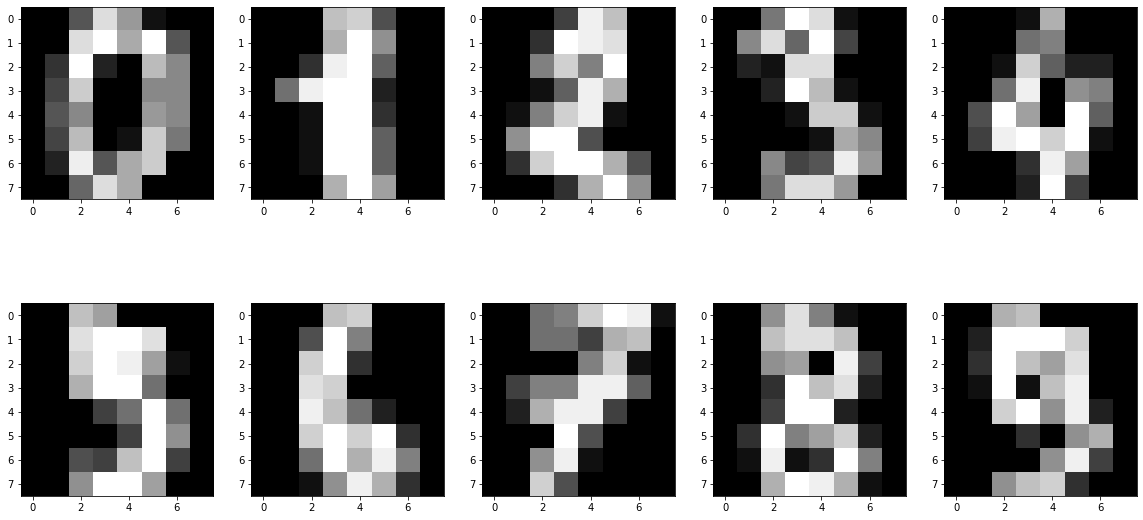

In [6]:
# 0~9까지 데이터 시각화
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

### 1.3 Data Split

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021)

print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 1257, 0.70
test_data size: 540, 0.30


# 2. Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

### 2.1 Learning

In [9]:
random_forest.fit(train_data, train_target)

RandomForestClassifier()

### 2.2 Feature Importance

In [10]:
random_forest.feature_importances_

array([0.00000000e+00, 2.22027389e-03, 2.01089999e-02, 1.07830476e-02,
       9.51528198e-03, 2.36360479e-02, 9.31093623e-03, 6.69196714e-04,
       8.85114030e-06, 8.82351373e-03, 2.63886754e-02, 6.78867334e-03,
       1.54145479e-02, 2.58694831e-02, 5.88021424e-03, 4.15847662e-04,
       0.00000000e+00, 6.79631151e-03, 2.29701107e-02, 2.65587908e-02,
       3.23883747e-02, 4.61493602e-02, 9.64852734e-03, 2.12386017e-04,
       1.65085512e-05, 1.53382481e-02, 4.21053792e-02, 2.57443328e-02,
       3.07340934e-02, 1.89734748e-02, 3.20272649e-02, 6.33666089e-05,
       0.00000000e+00, 3.04673193e-02, 2.16692479e-02, 2.20796421e-02,
       3.91744952e-02, 1.99743626e-02, 2.36173762e-02, 0.00000000e+00,
       1.17972340e-05, 1.03136921e-02, 3.92388221e-02, 3.67256272e-02,
       2.11985343e-02, 2.03332950e-02, 1.74046206e-02, 8.96174336e-05,
       4.31000081e-05, 2.92475245e-03, 1.62593325e-02, 2.46582747e-02,
       1.44533638e-02, 2.65565338e-02, 2.35906893e-02, 1.84734419e-03,
      

In [11]:
feature_importance = pd.Series(random_forest.feature_importances_)
feature_importance.head(10)

0    0.000000
1    0.002220
2    0.020109
3    0.010783
4    0.009515
5    0.023636
6    0.009311
7    0.000669
8    0.000009
9    0.008824
dtype: float64

In [12]:
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance.head(10)

21    0.046149
26    0.042105
42    0.039239
36    0.039174
43    0.036726
20    0.032388
30    0.032027
28    0.030734
33    0.030467
61    0.029491
dtype: float64

<AxesSubplot:>

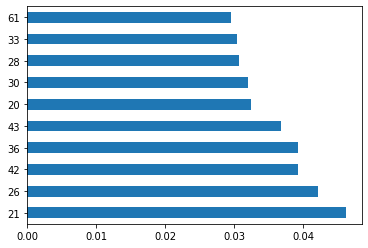

In [13]:
feature_importance.head(10).plot(kind="barh")

(-0.5, 7.5, 7.5, -0.5)

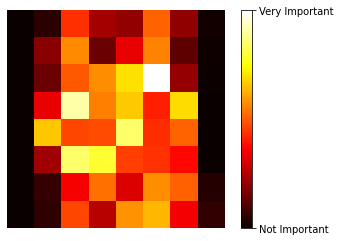

In [14]:
image = random_forest.feature_importances_.reshape(8, 8)

plt.imshow(image, cmap=plt.cm.hot, interpolation="nearest")
cbar = plt.colorbar(ticks=[random_forest.feature_importances_.min(), random_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])
plt.axis("off")

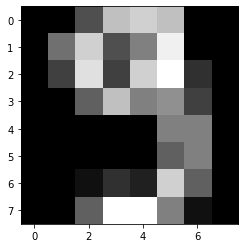

In [15]:
### 2.3 Predict

train_pred = random_forest.predict(train_data)
test_pred = random_forest.predict(test_data)

plt.imshow(train_data[4].reshape(8, 8), cmap="gray")

In [16]:
train_pred[4]

9

### 2.4 Evalution

In [17]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 1.0000
test accuracy is 0.9667


# 3. Best Hyper Parameter

RandomForestClassifier에서 주로 탐색하는 argument
- n_estimators
    - 몇 개의 나무를 생성할 것 인지 설정
- criterion
    - 어떤 정보 이득을 기준으로 데이터를 나눌지 설정
    - "gini", "entropy"
- max_depth
    - 나무의 최대 깊이 설정
- min_samples_split
    - 노드가 나눠질 수 있는 최소 데이터 개수를 설정

탐색해야할 argument들이 많을 때 일일이 지정을 하거나 for loop을 작성하기 힘듬  
이 때 사용할 수 있는 것이 `sklearn.model_selection`의 `GridSearchCV` 함수

### 3.1 Search Range Selection
- 탐색할 값들의 argument와 범위 설정

In [18]:
params = {
    "n_estimators": [i for i in range(100, 1000, 200)],
    "max_depth": [i for i in range(10, 50, 10)],}

params

{'n_estimators': [100, 300, 500, 700, 900], 'max_depth': [10, 20, 30, 40]}

In [19]:
# 탐색에 사용할 모델 생성
random_forest = RandomForestClassifier()

### 3.2 Exploration
- `cv`는 k-fold의 k값

In [20]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=random_forest, param_grid=params, cv=3)
grid = grid.fit(train_data, train_target)

### 3.3 Result

In [21]:
print(f"Best score of paramter search is: {grid.best_score_:.4f}")
print(f"Best parameter of best score is : {grid.best_params_:}")

Best score of paramter search is: 0.9730
Best parameter of best score is : {'max_depth': 30, 'n_estimators': 300}


In [22]:
best_rf = grid.best_estimator_
best_rf

RandomForestClassifier(max_depth=30, n_estimators=300)

### 3.4 Predict

In [23]:
train_pred = best_rf.predict(train_data)
test_pred = best_rf.predict(test_data)

### 3.5 Evalution

In [24]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)

print(f"Best parameter train accuracy is {best_train_acc:.4f}")
print(f"Best parameter test accuracy is {best_test_acc:.4f}")

Best parameter train accuracy is 1.0000
Best parameter test accuracy is 0.9704


In [25]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 1.0000
test accuracy is 0.9667


# 4. Feature importance

In [26]:
best_feature_importance = pd.Series(best_rf.feature_importances_)
best_feature_importance = best_feature_importance.sort_values(ascending=False)

best_feature_importance.head(10)

21    0.045323
26    0.044439
43    0.043824
36    0.040624
42    0.035054
28    0.033223
20    0.030152
30    0.029488
27    0.028930
60    0.028078
dtype: float64

<AxesSubplot:title={'center':'Best Parameter Feature Importance'}>

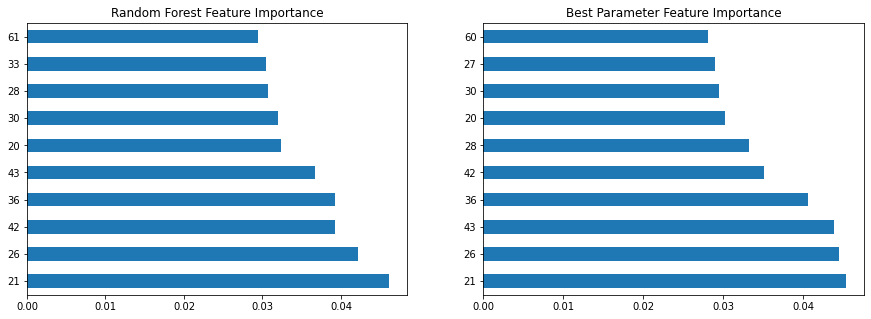

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
feature_importance.head(10).plot(kind="barh", ax=axes[0], title="Random Forest Feature Importance")
best_feature_importance.head(10).plot(kind="barh", ax=axes[1], title="Best Parameter Feature Importance")